# IPO Arbitrage

In [6]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
import hvplot.pandas
import hvplot.streamz
from streamz.dataframe import Random
%matplotlib inline

## Read the Stock Data from the each of the Stock's Historical Data CSV File and create a dataframe of the necessary values.

In [23]:
# Use the Pathlib libary to set the path to the 5 Stock CSV Files and Exchange Rate CSV File.
abnb_path = Path('Resources/ABNB-ABNB.csv')
dash_path = Path('Resources/DASH-DASH.csv')
prch_path = Path('Resources/PRCH-PRCH.csv')
snow_path = Path('Resources/SNOW-SNOW.csv')
upst_path = Path('Resources/UPST-UPST.csv')
exchange_rate_path = Path('Resources/Exchange_Rate.csv')

In [13]:
# Read in the ADNB-ABND.csv as a DataFrame
abnb_df = pd.read_csv(abnb_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
abnb_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,150.990005,151.005005,137.000000,139.149994,139.149994,6409900
2021-01-05,138.279999,149.000000,137.250000,148.300003,148.300003,5974200
2021-01-06,145.750000,148.350006,141.110001,142.770004,142.770004,4213900
2021-01-07,146.369995,154.419998,145.261002,151.270004,151.270004,4482800
2021-01-08,153.449997,155.539993,147.250000,149.770004,149.770004,4615600


In [14]:
# Drop the High, Low, Adj Close, and Volume Columns
abnb_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)
abnb_df.head()

,Open,Close
Date,,
2021-01-04,150.990005,139.149994
2021-01-05,138.279999,148.300003
2021-01-06,145.750000,142.770004
2021-01-07,146.369995,151.270004
2021-01-08,153.449997,149.770004


In [15]:
# Read in the DASH-DASH.csv as a DataFrame
dash_df = pd.read_csv(dash_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
dash_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,142.500000,143.619995,137.169998,139.190002,139.190002,2026400
2021-01-05,138.000000,146.119995,137.835007,144.429993,144.429993,1031800
2021-01-06,141.270004,142.000000,138.210007,140.009995,140.009995,1931400
2021-01-07,140.000000,154.639999,139.434998,152.770004,152.770004,3215200
2021-01-08,152.000000,158.309998,147.300003,156.089996,156.089996,2548700


In [16]:
# Drop the High, Low, Adj Close, and Volume Columns
dash_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)
dash_df.head()

,Open,Close
Date,,
2021-01-04,142.500000,139.190002
2021-01-05,138.000000,144.429993
2021-01-06,141.270004,140.009995
2021-01-07,140.000000,152.770004
2021-01-08,152.000000,156.089996


In [17]:
# Read in the PRCH-PRCH.csv as a DataFrame
prch_df = pd.read_csv(prch_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
prch_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,14.38,14.38,13.06,13.37,13.37,1096800
2021-01-05,13.40,13.49,12.91,13.31,13.31,1054300
2021-01-06,13.12,13.56,13.10,13.37,13.37,434300
2021-01-07,13.40,13.83,12.94,12.98,12.98,858600
2021-01-08,13.32,13.64,12.93,13.09,13.09,671200


In [18]:
# Drop the High, Low, Adj Close, and Volume Columns
prch_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)
prch_df.head()

,Open,Close
Date,,
2021-01-04,14.38,13.37
2021-01-05,13.40,13.31
2021-01-06,13.12,13.37
2021-01-07,13.40,12.98
2021-01-08,13.32,13.09


In [19]:
# Read in the SNOW-SNOW.csv as a DataFrame
snow_df = pd.read_csv(snow_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
snow_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,285.410004,290.799988,274.440002,278.239990,278.239990,3948500
2021-01-05,280.619995,293.489990,279.299988,283.829987,283.829987,5202600
2021-01-06,279.989990,283.639008,266.410004,268.019989,268.019989,5736800
2021-01-07,272.589996,304.899994,267.700012,304.200012,304.200012,16546600
2021-01-08,315.000000,325.720001,298.000000,300.100006,300.100006,9106800


In [20]:
# Drop the High, Low, Adj Close, and Volume Columns
snow_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)
snow_df.head()

,Open,Close
Date,,
2021-01-04,285.410004,278.239990
2021-01-05,280.619995,283.829987
2021-01-06,279.989990,268.019989
2021-01-07,272.589996,304.200012
2021-01-08,315.000000,300.100006


In [21]:
# Read in the UPST-UPST.csv as a DataFrame
upst_df = pd.read_csv(upst_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
upst_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,40.340000,45.000000,38.049999,43.990002,43.990002,1347100
2021-01-05,45.099998,53.630001,44.200001,48.369999,48.369999,3590700
2021-01-06,47.049999,57.000000,45.139999,52.139999,52.139999,2903200
2021-01-07,55.990002,61.259998,55.040001,55.389999,55.389999,1518900
2021-01-08,58.000000,58.000000,50.279999,52.730000,52.730000,1407700


In [22]:
# Drop the High, Low, Adj Close, and Volume Columns
upst_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)
upst_df.head()

,Open,Close
Date,,
2021-01-04,40.340000,43.990002
2021-01-05,45.099998,48.369999
2021-01-06,47.049999,52.139999
2021-01-07,55.990002,55.389999
2021-01-08,58.000000,52.730000


In [25]:
# Read in the Exchange_Rate.csv as a DataFrame
currency_df = pd.read_csv(exchange_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
currency_df.head()

,Brazilian real (BRL),Canadian dollar (CAD),Chilean peso (CLP),Euro (EUR),Japanese yen (JPY),U.S. dollar (USD)
Date,,,,,,
2021-01-04,0.133714,0.541318,0.000971,0.848712,0.006696,0.690234
2021-01-05,0.129664,0.543502,0.000982,0.847470,0.006696,0.690628
2021-01-06,0.129632,0.543422,0.000982,0.850497,0.006706,0.689331
2021-01-07,0.129507,0.544515,0.000994,0.849395,0.006718,0.691915
2021-01-08,0.128912,0.544637,0.000975,0.847652,0.006664,0.691961


<AxesSubplot:title={'center':'Daily Opening and Closing Prices for Airbnb, Inc.'}, xlabel='days', ylabel='price'>

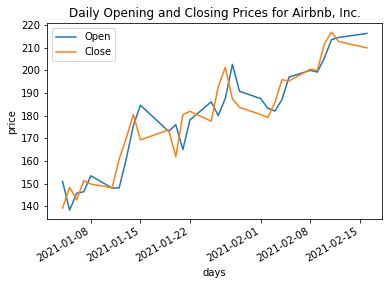

In [26]:
# Plotting the daily closing stock price of Airbnb, Inc. during last 30 days
abnb_df.plot(ylabel="price", xlabel="days", title="Daily Opening and Closing Prices for Airbnb, Inc.")

<AxesSubplot:title={'center':'Daily Opening and Closing Prices for DoorDash'}, xlabel='days', ylabel='price'>

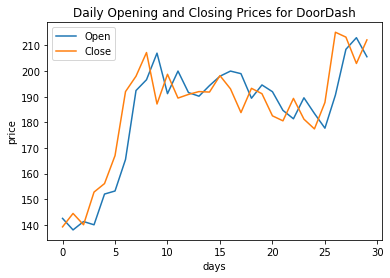

In [15]:
# Plotting the daily closing stock price of the DoorDash during the last 30 days 
dash_df.plot(xlabel="days", ylabel="price", title="Daily Opening and Closing Prices for DoorDash")

<AxesSubplot:title={'center':'Daily Opening and Closing Prices for Porch Group I'}, xlabel='days', ylabel='price'>

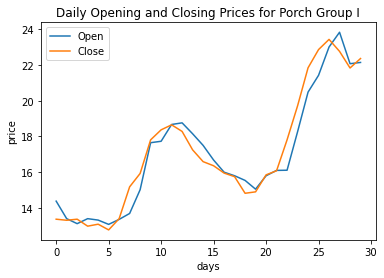

In [16]:
# Plotting the daily closing stock price of the Porch Group Inc. during the last 30 days 
prch_df.plot(ylabel="price", xlabel="days", title="Daily Opening and Closing Prices for Porch Group I")

<AxesSubplot:title={'center':'Daily Opening and Closing Prices for Snowflake'}, xlabel='days', ylabel='price'>

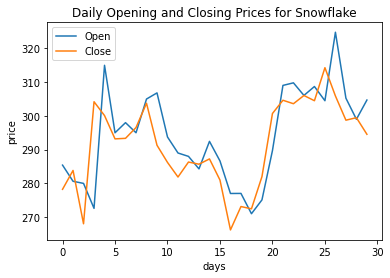

In [17]:
# Plotting the daily closing stock price of Snowflacke during the last 30 days 
snow_df.plot(ylabel="price", xlabel="days", title="Daily Opening and Closing Prices for Snowflake")

<AxesSubplot:title={'center':'Daily Opening and Closing Prices for Upstart Holdings Inc'}, xlabel='days', ylabel='price'>

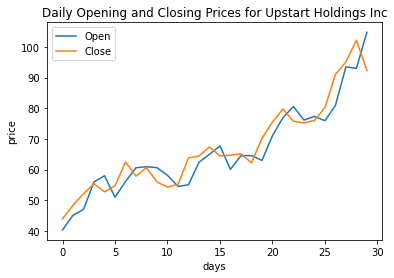

In [18]:
# Plotting the daily closing stock price of Upstart Holdings Inc during the last 30 days 
upst_df.plot(ylabel="price", xlabel="days", title="Daily Opening and Closing Prices for Upstart Holdings Inc")

In [19]:
# Combine opening and closing prices for each ticker
#combined_df = pd.concat([abnb_df, dash_df, prch_df, snow_df, upst_df], axis="columns", join="inner")

#combined_df = pd.concat([abnb_df, dash_df, prch_df, snow_df, upst_df], axis="columns", join="inner")
#combined_df.columns = ['ABNB Open', 'ABNB Close', 'DASH Open', 'DASH Close', 'PRCH Open', 'PRCH Close', 'SNOW Open', 'PRCH Close', 'UPST Open', 'UPST Close']
#combined_df.head()

# Sortting datetime index in ascending order 
#combined_df.sort_index()

# Setting column names 
#combined_df.columns = ['ABNB', 'DASH', 'PRCH', 'SNOW', 'UPST']

# Display a few rows
#combined_df.head()

In [20]:
#using hvplot, hvplot.bar, hvplot.scatter for visualization

In [21]:
abnb_df.hvplot(title="Opening & Closing Values of Airbnb last 30 days")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [22]:
dash_df.hvplot(kind="bar", title="Opening & Closing Values of DoorDash last 30 days", rot=90)

:Bars   [index,Variable]   (value)

In [23]:
snow_df.hvplot.scatter(title="Opening & Closing Values of Snowflake last 30 days")

:NdOverlay   [Variable]
   :Scatter   [index]   (value)

## Calculate the Daily Returns and Cumulative Returns for Each Stock's Close Price using the pct_change() function. Combine the Cumulative Returns of each 5 Stocks on 1 Plot.

In [32]:
# Calculate and display the Daily Returns of ABNB Closing price.
abnb_daily_returns = abnb_df.pct_change().drop(columns='Open')

display(abnb_daily_returns.head())
display(abnb_daily_returns.tail())

,Close
Date,
2021-01-04,NaN
2021-01-05,0.065756
2021-01-06,-0.037289
2021-01-07,0.059536
2021-01-08,-0.009916


,Close
Date,
2021-02-09,-0.002744
2021-02-10,0.058935
2021-02-11,0.024473
2021-02-12,-0.019185
2021-02-16,-0.013259


In [33]:
# Calculate and plot the Cumulative Returns of ABNB stock.
abnb_cumulative_returns = (abnb_daily_returns + 1).cumprod()
plot_abnb_cumulative_returns = abnb_cumulative_returns.hvplot()
plot_abnb_cumulative_returns

:Curve   [Date]   (Close)

In [28]:
# Calculate and display the Daily Returns of DASH Closing price.
dash_daily_returns = dash_df.pct_change().drop(columns='Open')

display(dash_daily_returns.head())
display(dash_daily_returns.head())

,Close
Date,
2021-01-04,NaN
2021-01-05,0.037646
2021-01-06,-0.030603
2021-01-07,0.091136
2021-01-08,0.021732


,Close
Date,
2021-01-04,NaN
2021-01-05,0.037646
2021-01-06,-0.030603
2021-01-07,0.091136
2021-01-08,0.021732


In [34]:
# Calculate and plot the Cumulative Returns of DASH stock.
dash_cumulative_returns = (dash_daily_returns + 1).cumprod()
plot_dash_cumulative_returns = dash_cumulative_returns.hvplot()
plot_dash_cumulative_returns

:Curve   [Date]   (Close)

In [29]:
#Calculate and display the the Daily Returns of PRCH closing price.
prch_daily_returns = prch_df.pct_change().drop(columns='Open')

display(prch_daily_returns.head())
display(prch_daily_returns.tail())

,Close
Date,
2021-01-04,NaN
2021-01-05,-0.004488
2021-01-06,0.004508
2021-01-07,-0.029170
2021-01-08,0.008475


,Close
Date,
2021-02-09,0.046703
2021-02-10,0.024934
2021-02-11,-0.028596
2021-02-12,-0.040861
2021-02-16,0.024279


In [35]:
# Calculate and plot the Cumulative Returns of PRCH stock.
prch_cumulative_returns = (prch_daily_returns + 1).cumprod()
plot_prch_cumulative_returns = prch_cumulative_returns.hvplot()
plot_prch_cumulative_returns

:Curve   [Date]   (Close)

In [30]:
#Calculate and display the Daily Returns of SNOW stock price.
snow_daily_returns = snow_df.pct_change().drop(columns='Open')

display(snow_daily_returns.head())
display(snow_daily_returns.tail())

,Close
Date,
2021-01-04,NaN
2021-01-05,0.020091
2021-01-06,-0.055702
2021-01-07,0.134990
2021-01-08,-0.013478


,Close
Date,
2021-02-09,0.032151
2021-02-10,-0.026663
2021-02-11,-0.023471
2021-02-12,0.002477
2021-02-16,-0.016429


In [36]:
# Calculate and plot the Cumulative Returns of SNOW stock.
snow_cumulative_returns = (snow_daily_returns + 1).cumprod()
plot_snow_cumulative_returns = snow_cumulative_returns.hvplot()
plot_snow_cumulative_returns

:Curve   [Date]   (Close)

In [31]:
#Calculate and display the Daily Returns of UPST stock price.
upst_daily_returns = upst_df.pct_change().drop(columns='Open')

display(upst_daily_returns.head())
display(upst_daily_returns.tail())

,Close
Date,
2021-01-04,NaN
2021-01-05,0.099568
2021-01-06,0.077941
2021-01-07,0.062332
2021-01-08,-0.048023


,Close
Date,
2021-02-09,0.055921
2021-02-10,0.134455
2021-02-11,0.044925
2021-02-12,0.074109
2021-02-16,-0.096888


In [37]:
# Calculate and plot the Cumulative Returns of UPST stock.
upst_cumulative_returns = (upst_daily_returns + 1).cumprod()
plot_upst_cumulative_returns = upst_cumulative_returns.hvplot()
plot_upst_cumulative_returns

:Curve   [Date]   (Close)

In [38]:
# Combine Cumulative Returns of the 5 stocks onto 1 Dataframe
merged_cum_returns = pd.concat([upst_cumulative_returns, snow_cumulative_returns, dash_cumulative_returns, prch_cumulative_returns, abnb_cumulative_returns], axis="columns", join="inner")
merged_cum_returns.columns = ['UPST', 'SNOW', 'DASH', 'PRCH', 'ABNB']
merged_cum_returns.head()

,UPST,SNOW,DASH,PRCH,ABNB
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,1.099568,1.020091,1.037646,0.995512,1.065756
2021-01-06,1.185269,0.963269,1.005891,1.000000,1.026015
2021-01-07,1.259150,1.093301,1.097564,0.970830,1.087100
2021-01-08,1.198681,1.078565,1.121417,0.979058,1.076321


In [39]:
# Plot the combined Cumulative Returns using HvPlot. Be sure to add a title and label both the x and y axis.
merged_cum_returns.hvplot(title="Cumulative Returns for the first 30 trading days of 2021", ylabel='Cumulative Return')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)